In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import urllib.request
from PIL import Image

In [2]:
the_office_df = pd.read_csv("output/the_office.csv")
the_office_df

,Unnamed: 0,tconst_series,tconst_episode,primaryTitle_series,primaryTitle_episode,seasonNumber,episodeNumber,averageRating,cast,characters
0,0,tt0386676,tt0664521,The Office,Pilot,1,1,7.6,"['Steve Carell', 'Rainn Wilson', 'John Krasins...","['Michael Scott', 'Dwight Schrute', 'Jim Halpe..."
1,1,tt0386676,tt0664514,The Office,Diversity Day,1,2,8.3,"['Steve Carell', 'Rainn Wilson', 'John Krasins...","['Michael Scott', 'Dwight Schrute', 'Jim Halpe..."
2,2,tt0386676,tt0664517,The Office,Health Care,1,3,7.9,"['Steve Carell', 'Rainn Wilson', 'John Krasins...","['Michael Scott', 'Dwight Schrute', 'Jim Halpe..."
3,3,tt0386676,tt0664523,The Office,The Alliance,1,4,8.1,"['Steve Carell', 'Rainn Wilson', 'John Krasins...","['Michael Scott', 'Dwight Schrute', 'Jim Halpe..."
4,4,tt0386676,tt0664510,The Office,Basketball,1,5,8.4,"['Steve Carell', 'Rainn Wilson', 'John Krasins...","['Michael Scott', 'Dwight Schrute', 'Jim Halpe..."
5,5,tt0386676,tt0664518,The Office,Hot Girl,1,6,7.8,"['Steve Carell', 'Rainn Wilson', 'John Krasins...","['Michael Scott', 'Dwight Schrute', 'Jim Halpe..."


In [3]:
working_df = pd.DataFrame()
index = pd.MultiIndex.from_product([list(the_office_df.primaryTitle_episode), ['Cast','Characters']],
                                  names=['Episode',''])
for idx, row in the_office_df.iterrows():
    
    # Turn cast members string from an episode into a list of individual cast members
    cast_list = row.cast[1:-1]
    cast_list = cast_list.replace('\'', '').split(', ')
    
    # Turn characters string from an episode into a list of individual characters
    character_list = row.characters[1:-1]
    character_list = character_list.replace('\'', '').split(', ')
    
    # Add the cast/character pairs to the working DataFrame
    working_df[row.primaryTitle_episode + ' Cast'] = cast_list
    working_df[row.primaryTitle_episode + ' Character'] = character_list
    #working_df[row.primaryTitle_episode] = list(zip(cast_list, character_list))
    
# Transpose the working_df so every row is associated to an episode of the show
working_df = working_df.T
working_df = pd.DataFrame(working_df.values, index=index, columns=range(1,15))

# Fix weirdly formatted names from the DataFrame
working_df.loc[('Basketball', 'Cast'), 8] = 'Patrice O\'Neal'
working_df.loc[('The Alliance', 'Characters'), 13] = 'Oscar Martinez'

working_df

1               2               3   \
Episode                                                                   
Pilot         Cast         Steve Carell    Rainn Wilson  John Krasinski   
              Characters  Michael Scott  Dwight Schrute     Jim Halpert   
Diversity Day Cast         Steve Carell    Rainn Wilson  John Krasinski   
              Characters  Michael Scott  Dwight Schrute     Jim Halpert   
Health Care   Cast         Steve Carell    Rainn Wilson  John Krasinski   
              Characters  Michael Scott  Dwight Schrute     Jim Halpert   
The Alliance  Cast         Steve Carell    Rainn Wilson  John Krasinski   
              Characters  Michael Scott  Dwight Schrute     Jim Halpert   
Basketball    Cast         Steve Carell    Rainn Wilson  John Krasinski   
              Characters  Michael Scott  Dwight Schrute     Jim Halpert   
Hot Girl      Cast         Steve Carell    Rainn Wilson  John Krasinski   
              Characters  Michael Scott  Dwight Schrute     Jim Halpert   

                                     4            5                   6   \
Episode                                                                    
Pilot         Cast        Jenna Fischer   B.J. Novak       Melora Hardin   
              Characters     Pam Beesly  Ryan Howard  Jan Levinson-Gould   
Diversity Day Cast        Jenna Fischer   B.J. Novak       Larry Wilmore   
              Characters     Pam Beesly  Ryan Howard           Mr. Brown   
Health Care   Cast        Jenna Fischer   B.J. Novak       Melora Hardin   
              Characters     Pam Beesly  Ryan Howard  Jan Levinson-Gould   
The Alliance  Cast        Jenna Fischer   B.J. Novak        David Denman   
              Characters     Pam Beesly  Ryan Howard        Roy Anderson   
Basketball    Cast        Jenna Fischer   B.J. Novak        David Denman   
              Characters     Pam Beesly  Ryan Howard        Roy Anderson   
Hot Girl      Cast        Jenna Fischer   B.J. Novak           Amy Adams   
              Characters     Pam Beesly  Ryan Howard                Katy   

                                          7                   8   \
Episode                                                            
Pilot         Cast              David Denman  Leslie David Baker   
              Characters        Roy Anderson      Stanley Hudson   
Diversity Day Cast        Leslie David Baker   Brian Baumgartner   
              Characters      Stanley Hudson        Kevin Malone   
Health Care   Cast        Leslie David Baker   Brian Baumgartner   
              Characters      Stanley Hudson        Kevin Malone   
The Alliance  Cast            Craig Robinson  Leslie David Baker   
              Characters      Darryl Philbin      Stanley Hudson   
Basketball    Cast            Craig Robinson      Patrice O'Neal   
              Characters      Darryl Philbin               Lonny   
Hot Girl      Cast             Melora Hardin        David Denman   
              Characters  Jan Levinson-Gould        Roy Anderson   

                                          9                  10  \
Episode                                                           
Pilot         Cast         Brian Baumgartner      Angela Kinsey   
              Characters        Kevin Malone      Angela Martin   
Diversity Day Cast             Kate Flannery       Mindy Kaling   
              Characters     Meredith Palmer       Kelly Kapoor   
Health Care   Cast             Kate Flannery   Charlie Hartsock   
              Characters     Meredith Palmer       Travel Agent   
The Alliance  Cast         Brian Baumgartner      Kate Flannery   
              Characters        Kevin Malone    Meredith Palmer   
Basketball    Cast        Leslie David Baker  Brian Baumgartner   
              Characters      Stanley Hudson       Kevin Malone   
Hot Girl      Cast        Leslie David Baker  Brian Baumgartner   
              Characters      Stanley Hudson       Kevin Malone   

                             

In [4]:
working_df.loc[('Basketball', 'Cast'), 1]

'Steve Carell'

In [5]:
# Find all the unique actors/actresses involved with the first season of The Office
cast_set = set()
for episode in working_df.index.get_level_values('Episode'):
    episode_set = set(working_df.loc[(episode,'Cast'),:])
    cast_set = cast_set.union(episode_set)

# Create a new DataFrame involving only the cast members of The Office
cast_df = pd.DataFrame()
cast_df['Cast Member'] = pd.Series(list(cast_set))
#cast_df = cast_df.set_index('Cast Member')

# Create a gender column for the cast members
cast_df['Gender'] = pd.Series(['M'] * len(cast_set))
female_list = ['Angela Kinsey', 'Phyllis Smith', 'Kate Flannery', 'Amy Adams', 'Mindy Kaling', 'Henriette Mantel',
              'Jenna Fischer', 'Melora Hardin']
cast_df.loc[cast_df['Cast Member'].isin(female_list), 'Gender'] = 'F'
cast_df

,Cast Member,Gender
0,Charlie Hartsock,M
1,Steve Carell,M
2,Mike McCaul,M
3,Kate Flannery,F
4,Rainn Wilson,M
5,Amy Adams,F
6,Brian Baumgartner,M
7,Paul Lieberstein,M
8,David Denman,M
9,B.J. Novak,M


In [129]:
def load_rgba_2_1bit(img_url):
    img = Image.open(urllib.request.urlopen(img_url))
    img = img.convert('1')
    img = np.array(img)
    return img

In [145]:
a = [1,2,3]
a.append([4,5,6])
a

[1, 2, 3, [4, 5, 6]]

In [175]:
def change_color(img1bit, color):
    img = []
    for row_idx, row in enumerate(img1bit):
        
        row_data = []
        for col_idx, col in enumerate(row):
            if img1bit[row_idx][col_idx] == True:
                row_data.append([255,255,255])
            else:
                row_data.append(color)
        img.append(row_data)
        
    #img = np.asarray(img, dtype='int32')
    return img

In [77]:
female_icon_url = "https://raw.githubusercontent.com/aldenmchico/Alden-Chicos-Portfolio/master/Character-Impact/reference/3-The_Office_EDA/female_icon.png"
male_icon_url = "https://raw.githubusercontent.com/aldenmchico/Alden-Chicos-Portfolio/master/Character-Impact/reference/3-The_Office_EDA/male_icon.jpg"

In [157]:
x = []
if female_icon[60][60] == True:
    x.append([255,255,255])
else:
    x.append([255,206,249])
x

[[255, 206, 249]]

In [184]:
pink = [255,206,249]
female_icon = load_rgba_2_1bit(female_icon_url)
#female_icon = change_color(female_icon, pink)


blue = [0,0,255]
male_icon = load_rgba_2_1bit(male_icon_url)
print(male_icon[120][120])
#male_icon
#male_icon = change_color(male_icon, blue)
#img = Image.open(urllib.request.urlopen(female_icon_url))
#img = img.convert('1')
#img = np.array(img, dtype='int32')
#plt.imshow(male_icon)
#plt.show()

False


In [44]:
np.all([~np.array([0,0,0], dtype='bool'),~np.array([1,1,1], dtype='bool')])
~np.array([255,255,255],dtype='bool')

array([False, False, False])

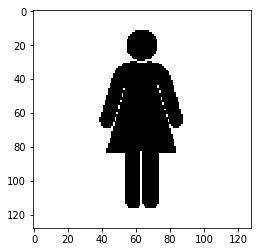

[0 0 0]


True

In [36]:
img = Image.open(urllib.request.urlopen(female_icon_url))
img = img.convert('RGB')
img = np.array(img, dtype='int32')
plt.imshow(img)
plt.show()

print(img[60][60])
np.all([~np.array((img[0][0])), ~np.array(([1,1,1]))])


In [7]:
def show_images(images, cols = 1, titles = None):
    """Display a list of images in a single figure with matplotlib.
    
    Parameters
    ---------
    images: List of np.arrays compatible with plt.imshow.
    
    cols (Default = 1): Number of columns in figure (number of rows is 
                        set to np.ceil(n_images/float(cols))).
    
    titles: List of titles corresponding to each image. Must have
            the same length as titles.
    """
    assert((titles is None)or (len(images) == len(titles)))
    n_images = len(images)
    if titles is None: titles = ['' for i in range(1,n_images + 1)]
    fig = plt.figure()
    for n, (image, title) in enumerate(zip(images, titles)):
        a = fig.add_subplot(cols, np.ceil(n_images/float(cols)), n + 1)
        if image.ndim == 2:
            plt.gray()
        plt.imshow(image)
        plt.xticks([])
        plt.yticks([])
        a.set_title(title)
    #fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
    plt.show()

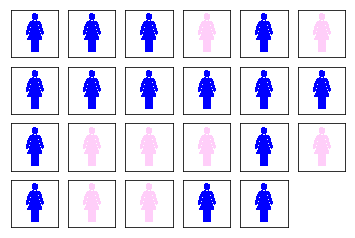

In [59]:
icons = []
for idx, row in cast_df.iterrows():
    if row.Gender == 'M':
        icons.append(male_icon)
    if row.Gender == 'F':
        icons.append(female_icon)
show_images(icons, cols = 4)